In [34]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import gudhi as gd
from ripser import ripser
from persim import plot_diagrams, bottleneck, bottleneck_matching

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy, binary_accuracy
from tensorflow.keras import Model

In [16]:
def dataGet(numData, numVar, numOutcome):
    data = np.random.randint(low=0, high=numOutcome, size = (numData, numVar))
    x_train = OneHotEncoder(categories='auto',sparse=False).fit_transform(data)

    data = np.random.randint(low=0, high=numOutcome, size = (numData, numVar))
    x_valid = OneHotEncoder(categories='auto',sparse=False).fit_transform(data)
    
    return x_train, x_valid

def embeddingGet(x_train, x_valid, embeddingDim=None, numPoints=None):
    es = EarlyStopping(monitor='val_loss', min_delta=0., patience=1, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

    input_dim = x_train.shape[1]
    if embeddingDim==None:
        embeddingDim = input_dim - 1
    
    encoder = Sequential([
        Dense(embeddingDim, input_shape=(input_dim,)),
        Dense(input_dim),
    ])

    encoder.compile(loss='mse', optimizer='Adam')
    
    encoder.fit(x_train, x_train,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(x_valid, x_valid), 
            callbacks=[es])

    layer_name = encoder.layers[0].name
    embedder = Model(inputs=encoder.input, outputs=encoder.get_layer(layer_name).output)
    
    if numPoints:
        points = np.array([list(i) for i in embedder.predict(x_train[0:numPoints])])
    else:
        points = np.array([list(i) for i in embedder.predict(x_train)])
    
    return points
    
    
def allBottleneckDistances(barcodes1, barcodes2, maxDimensions=0):
    numDistances = len(barcodes1) if maxDimensions == 0 else min(maxDimensions, len(barcodes1))
    distances = [bottleneck(barcodes1[i], barcodes2[i]) for i in range(numDistances)]
    
    return distances

In [41]:
numData = 100000
numVar = 30
numOutcome = 3

x_train_1, x_valid_1 = dataGet(numData, numVar, numOutcome)
points_1_1 = embeddingGet(x_train, x_valid, embeddingDim=None, numPoints=100)
points_1_2 = embeddingGet(x_train, x_valid, embeddingDim=None, numPoints=100)

x_train_2, x_valid_2 = dataGet(numData, numVar, numOutcome)
points_2_1 = embeddingGet(x_train, x_valid, embeddingDim=None, numPoints=100)
points_2_2 = embeddingGet(x_train, x_valid, embeddingDim=None, numPoints=100)

Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/100000 [==============================] - 5s 47us/sample - loss: 0.0130 - val_loss: 2.5276e-14
Epoch 2/50
100000/100000 [==============================] - 4s 44us/sample - loss: 1.3461e-05 - val_loss: 3.1419e-05
Epoch 00002: early stopping
Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/100000 [==============================] - 5s 46us/sample - loss: 0.0129 - val_loss: 2.5651e-14
Epoch 2/50
100000/100000 [==============================] - 4s 44us/sample - loss: 1.0229e-05 - val_loss: 1.4160e-05
Epoch 00002: early stopping
Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/100000 [==============================] - 5s 46us/sample - loss: 0.0130 - val_loss: 2.6780e-14
Epoch 2/50
100000/100000 [==============================] - 4s 44us/sample - loss: 1.1088e-05 - val_loss: 1.5993e-05
Epoch 00002: early stopping
Train on 100000 samples, validate on 100000 samples
Epoch 1/50
100000/

In [43]:
ripResult_1_1 = ripser(points_1_1, maxdim=4)
diagrams_1_1 = ripResult_1_1['dgms']

ripResult_1_2 = ripser(points_1_2, maxdim=4)
diagrams_1_2 = ripResult_1_2['dgms']

distances = allBottleneckDistances(diagrams_1_1, diagrams_1_2)
distances

[0.2869839668273926,
 0.18323516845703125,
 0.08281707763671875,
 0.09364533424377441,
 0.05245637893676758]

In [44]:
ripResult_1_1 = ripser(points_1_1, maxdim=4)
diagrams_1_1 = ripResult_1_1['dgms']

ripResult_2_1 = ripser(points_2_1, maxdim=4)
diagrams_2_1 = ripResult_2_1['dgms']

distances = allBottleneckDistances(diagrams_1_1, diagrams_2_1)
distances

[0.22194290161132812,
 0.1252455711364746,
 0.08672904968261719,
 0.05703544616699219,
 0.06604981422424316]

<IPython.core.display.Javascript object>


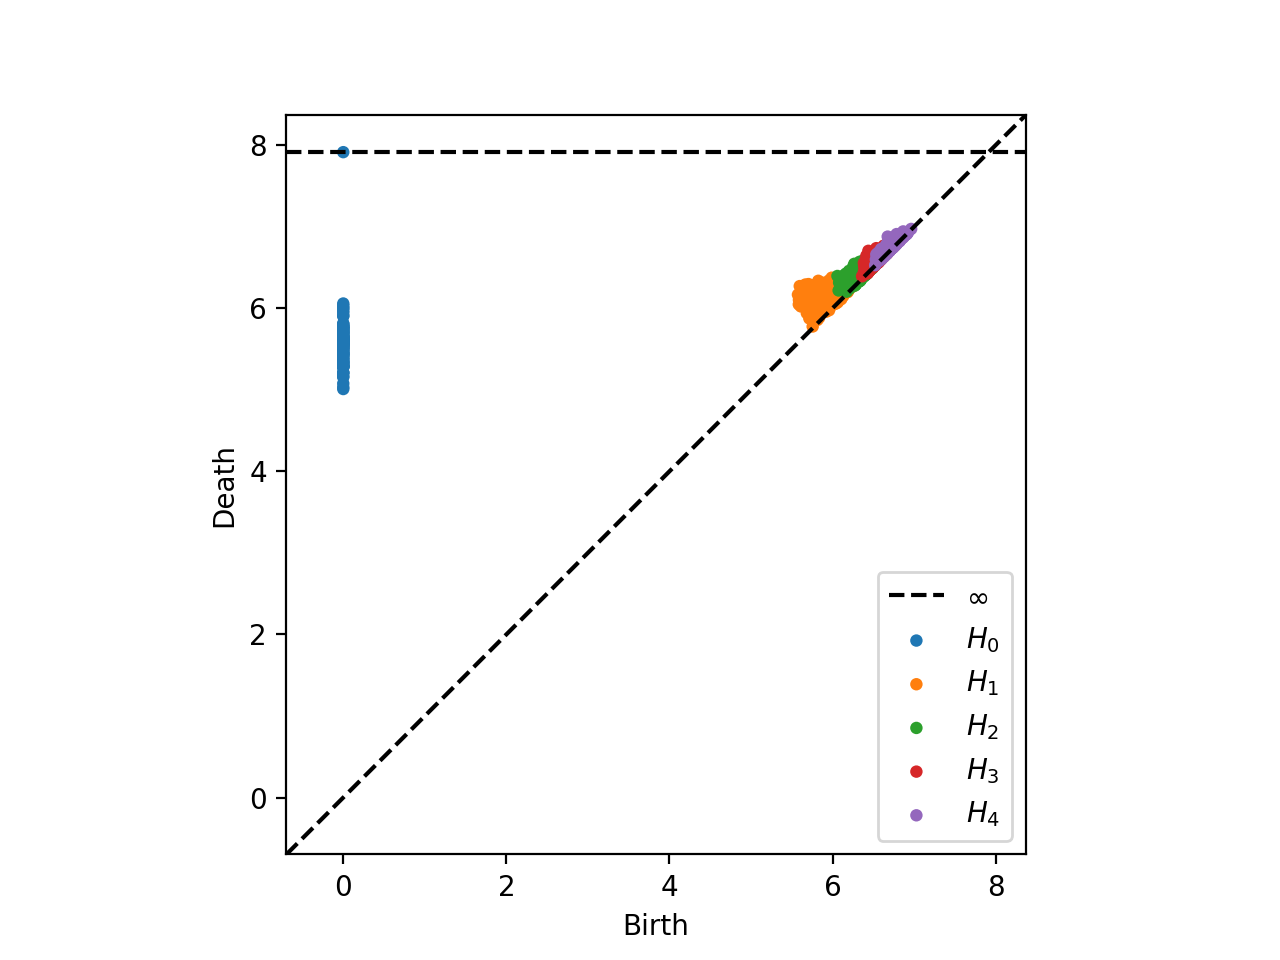

In [35]:
plt.figure()
plot_diagrams(diagrams_1_1, show=True)

0.06631326675415039


<IPython.core.display.Javascript object>


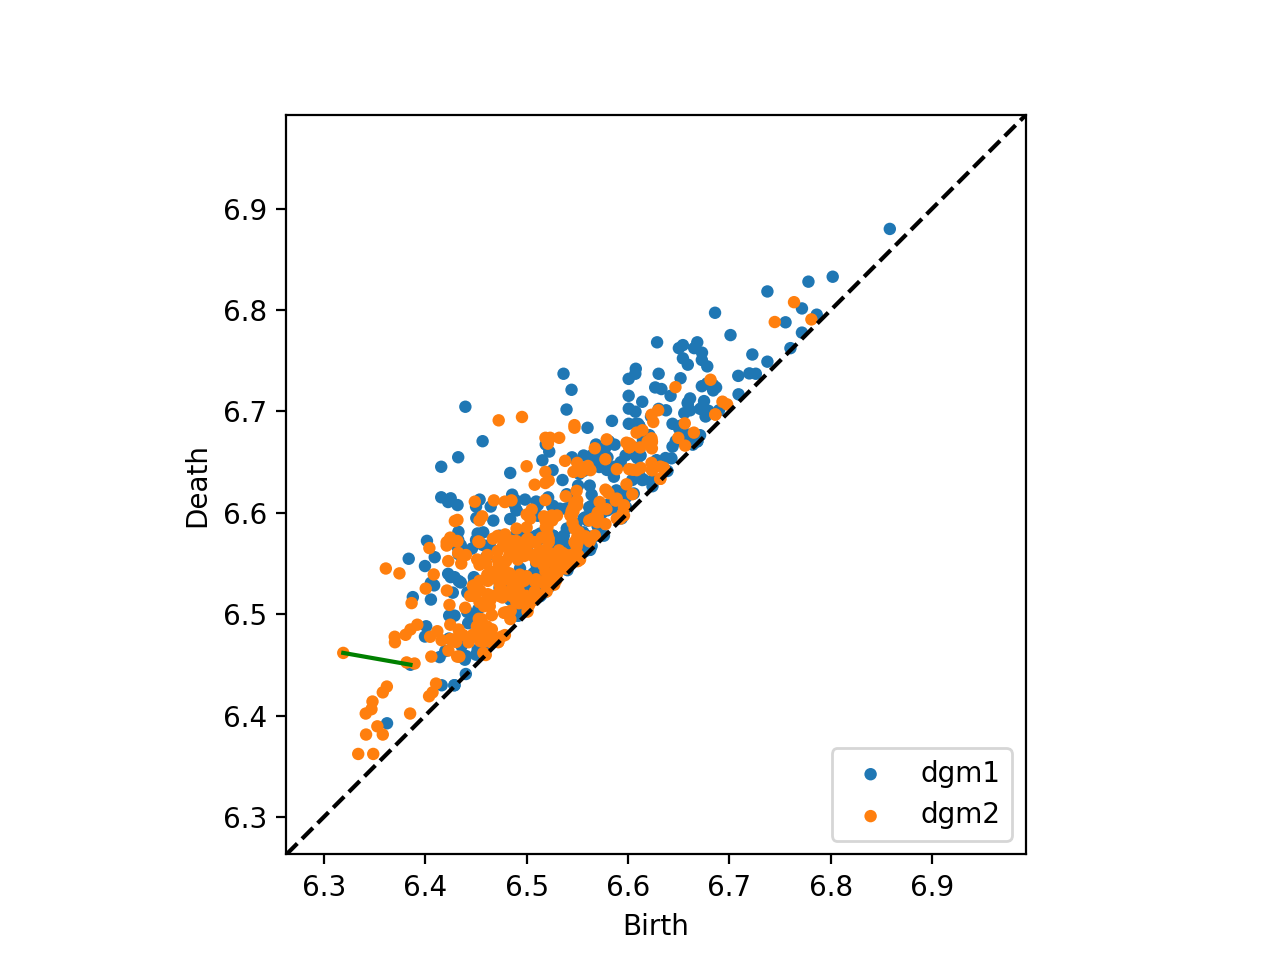

In [40]:
index = 3
distance_bottleneck, (matching, D) = bottleneck(diagrams1[index], diagrams2[index], matching=True)
print(distance_bottleneck)

plt.figure()
bottleneck_matching(diagrams1[index], diagrams2[index], matching, D)

In [ ]:
old='''
skeleton = gd.RipsComplex(points=points) 
Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension=4)
BarCodes_Rips0 = Rips_simplex_tree.persistence()
gd.plot_persistence_diagram(BarCodes_Rips0);



es = EarlyStopping(monitor='val_loss', min_delta=0., patience=1, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
try:
    oldPoints = points.copy()
    oldRipResult = ripResult.copy()
except:
    pass
  
encoder = Sequential([
    Dense(embeddingDim, input_shape=(input_dim,)),
    Dense(input_dim),
])

#loss = 'binary_crossentropy'
loss = 'mse'
encoder.compile(loss=loss, optimizer='Adam')
encoder.summary()




encoder.fit(x_train, x_train,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(x_valid, x_valid), 
            callbacks=[es])
layer_name = encoder.layers[0].name
embedder = Model(inputs=encoder.input, outputs=encoder.get_layer(layer_name).output)


'''

